In [1]:
# spam filtering
import pandas as pd
df = pd.read_csv('/home/anshul/MMLSL/chapter06/SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
print('Number of spam messages: ', df[df[0] == 'spam'][0].count())
print('Number of ham messages: ', df[df[0] == 'ham'][0].count())

Number of spam messages:  747
Number of ham messages:  4825


In [10]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

for i, prediction in enumerate(predictions[:5]):
    print('\nPredicted: ', prediction, '\nMessage: ', X_test_raw[i])


Predicted:  ham 
Message:  I love to cuddle! I want to hold you in my strong arms right now...

Predicted:  spam 
Message:  UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme. TsCs087147403231Winawk!Age16 £1.50perWKsub

Predicted:  ham 
Message:  Ok. I.ll do you right later.

Predicted:  ham 
Message:  His frens go then he in lor. Not alone wif my mum n sis lor.

Predicted:  ham 
Message:  Good morning princess! Have a great day!


In [11]:
# binary classification performance metrics - accuracy, precision, recall, F1-score, ROC-AUC score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4 1]
 [2 3]]


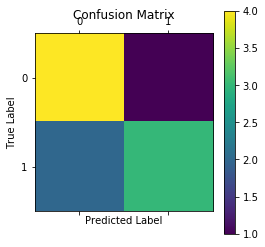

In [14]:
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
# Accuracy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
% matplotlib inline

In [16]:
df = pd.read_csv('/home/anshul/MMLSL/chapter06/sms.csv')
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [18]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracies: ', scores)
print('Mean Accuracy: ', scores.mean())
# Alternatively
# print('Mean Accuracy: ', np.mean(scores))

Accuracies:  [0.95221027 0.95454545 0.96172249 0.96052632 0.95209581]
Mean Accuracy:  0.9562200683094717
Mean Accuracy:  0.9562200683094717
